# Module

In [74]:
import numpy as np
from pycocotools.coco import COCO 
import matplotlib.pyplot as plt
import random
import cv2

# Category IDs

In [81]:
category_id_to_name = {0: 'General trash', 1: 'Paper', 2: 'Paper pack', 3: 'Metal', 4: 'Glass', 5: 'Plastic', 6: 'Styrofoam', 7: 'Plastic bag', 8: 'Battery', 9: 'Clothing'}
BOX_COLOR = [[random.randint(0, 255) for _ in range(3)] for _ in range(10)]
TEXT_COLOR = (255, 255, 255)

# Data preprocessing

In [79]:
# 경로 정보
annotation = '../dataset/train.json'
data_dir = '../dataset/'

In [80]:
# Make COCO instance
coco = COCO(annotation)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


In [83]:
def get_bboxes_and_labels(img_id):

    # Annotation info
    anns_id = coco.getAnnIds(imgIds=1)  
    anns = coco.loadAnns(anns_id)

    # 정답 정보
    bboxes = np.array([x['bbox'] for x in anns])
    labels = np.array([x['category_id']+1 for x in anns]) 

    # Load image
    image_id = coco.getImgIds(imgIds=1)
    image_info = coco.loadImgs(image_id)[0]
    img_name=image_info['file_name']
    img_path = data_dir + img_name
    img = cv2.imread(img_path,cv2.IMREAD_COLOR)

    return img, bboxes, labels

# 시각화

In [84]:
def visualize_bbox(img, bbox, class_name, color, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), color, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name, BOX_COLOR[category_id])
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

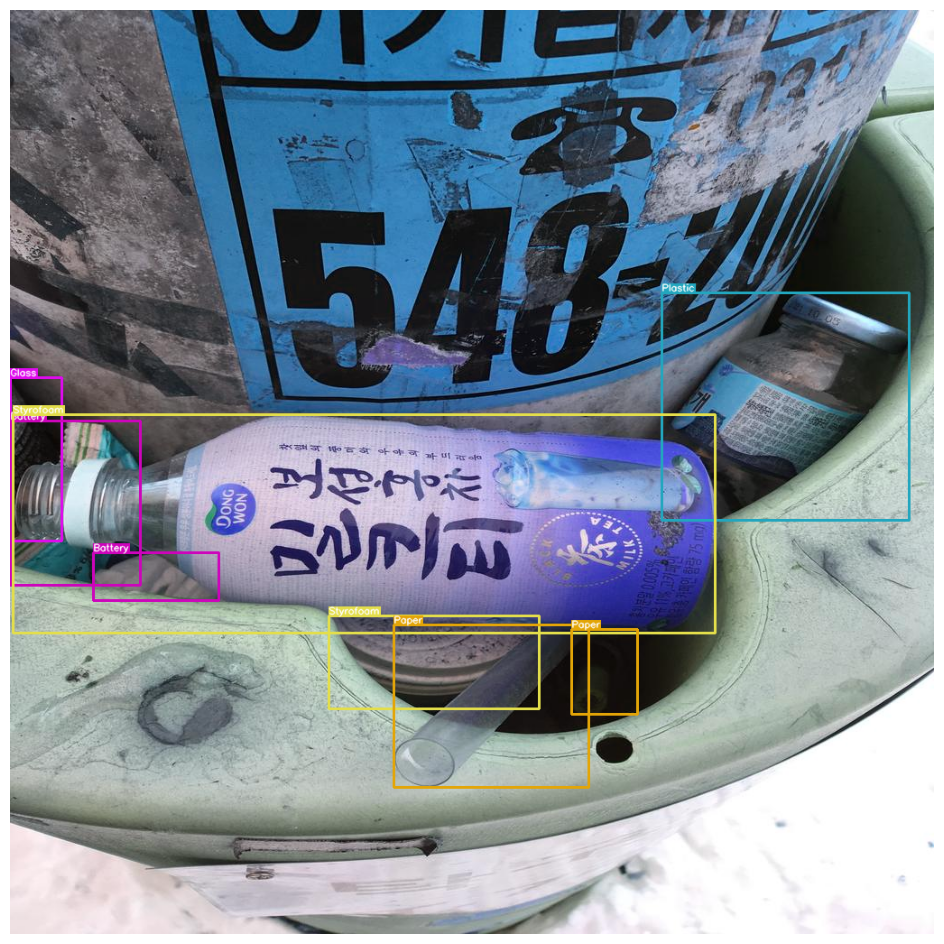

In [87]:
visualize(*get_bboxes_and_labels(1))